Last modified by Soshant Bali on 12/5/2016

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [11]:
smrkt_weekly_df = pd.read_csv('data/Weekly.csv')
del smrkt_weekly_df['Unnamed: 0']
smrkt_weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [12]:
smrkt_weekly_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [13]:
smrkt_weekly_df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009409240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA12390>]], dtype=object)

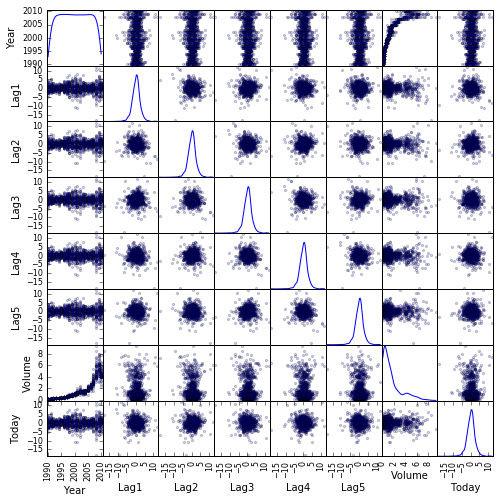

In [16]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
scatter_matrix(smrkt_weekly_df, alpha=0.2, figsize=(8,8), diagonal='kde')

(a) Volume and year are correlated, but other than that, there is no discernable pattern

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
gl_model = smf.glm(formula='Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', family=sm.families.Binomial(), data=smrkt_weekly_df)
gl_result = gl_model.fit()
gl_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Mon, 05 Dec 2016   Deviance:                       1486.4
Time:                                          17:43:10   Pearson chi2:                 1.09e+03
No. Iterations:                                       6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002        -0.435    -0.098
Lag1           0.0413      0.026      1.563      0.118        -0.010     0.093
Lag2          -0.0584      0.027     -2.175      0.030        -0.111    -0.006
Lag3           0.0161      0.027      0.602      0.547        -0.036     0.068
Lag4           0.0278      0.026      1.050      0.294        -0.024     0.080
Lag5           0.0145      0.026      0.549      0.583        -0.037     0.066
Volume         0.0227      0.037      0.616      0.538        -0.050     0.095
==============================================================================
"""

(b) Lag 2 is the only one with some correlation

In [40]:
predicted_probs=gl_result.predict(smrkt_weekly_df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
boolean_predictions=predicted_probs>0.5
boolean_truevalues = smrkt_weekly_df['Direction']=='Up'
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(boolean_truevalues,boolean_predictions).ravel()
print(tn, fp, fn, tp)

430 54 557 48


(c) confusion matrix is shown above. It is clear that Linear regression is incorrectly predicting a large number of Up days as Down. 

In [51]:
#Linear regression with only 'Lag2' and Test data
Training_df = smrkt_weekly_df[smrkt_weekly_df['Year']<2009]
Test_df = smrkt_weekly_df[smrkt_weekly_df['Year']>2008]
import statsmodels.api as sm
import statsmodels.formula.api as smf
gl_model = smf.glm(formula='Direction~Lag2', family=sm.families.Binomial(), data=Training_df)
gl_result = gl_model.fit()
gl_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      983
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -675.27
Date:                                  Mon, 05 Dec 2016   Deviance:                       1350.5
Time:                                          18:17:12   Pearson chi2:                     985.
No. Iterations:                                       6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2033      0.064     -3.162      0.002        -0.329    -0.077
Lag2          -0.0581      0.029     -2.024      0.043        -0.114    -0.002
==============================================================================
"""

In [52]:
#Confusion matrix using test data
predicted_probs=gl_result.predict(Test_df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
boolean_predictions=predicted_probs>0.5
boolean_truevalues = Test_df['Direction']=='Up'
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(boolean_truevalues,boolean_predictions).ravel()
print(tn, fp, fn, tp)

34 9 56 5


(d) Logistic regression results are shown above

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf=LDA()
#Training_df.loc[:,'Lag1':'Lag2'].values
clf.fit(Training_df.loc[:,'Lag1':'Lag2'].values,Training_df.Direction)
test_predictions=clf.predict(Test_df.loc[:,'Lag1':'Lag2'].values)
test_truevalues = Test_df.Direction
tn, fp, fn, tp = confusion_matrix(test_truevalues,test_predictions).ravel()
print(tn, fp, fn, tp)

7 36 8 53


(e) Linear Discrimannt analysis increases the false positive rate (falsely predicting 'Up' when truth is 'Down'); however, it also reduces the false negative rate

In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
clf=QDA()
clf.fit(Training_df.loc[:,'Lag1':'Lag2'].values,Training_df.Direction)
test_predictions=clf.predict(Test_df.loc[:,'Lag1':'Lag2'].values)
test_truevalues = Test_df.Direction
tn, fp, fn, tp = confusion_matrix(test_truevalues,test_predictions).ravel()
print(tn, fp, fn, tp)

7 36 10 51


(f) QDA performs similar to LDA

In [71]:
#KNN Nearest Neighbor Classifier
from sklearn import neighbors
#1 nearest neighbor
clf = neighbors.KNeighborsClassifier(1,weights='distance')
clf.fit(Training_df.loc[:,'Lag1':'Lag2'].values,Training_df.Direction)
test_predictions = clf.predict(Test_df.loc[:,'Lag1':'Lag2'].values)
test_truevalues = Test_df.Direction
tn, fp, fn, tp = confusion_matrix(test_truevalues,test_predictions).ravel()
print(tn, fp, fn, tp)

18 25 29 32


(g)KNN did not perform well either